In [258]:
import numpy as np
from numpy import count_nonzero
import mnist
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score


# 1 - create a Dense model from Keras with :
- an input layer of 784 (pixels of the image)
- a layer to rescale an input in the [0, 255] range to be in the [0, 1] range
- two hidden layers of 64 neurons using relu as activation function
- an output layer of 10 neurons using softmax as activation function

In [173]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [174]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [2]:
print(test_labels)

NameError: name 'test_labels' is not defined

In [192]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)



# 2 - compile the model with :
- categorical_crossentropy as loss function
- adam as optimizer with 0.001 as learning rate

In [194]:
# Compile the model.
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

# 3 - fit the training with 30 epoch

In [195]:
# Train the model.
model.fit(
train_images,
to_categorical(train_labels),
epochs=30,
batch_size=1,
)

Epoch 1/30
60000/60000 [==============================] - 45s 741us/step - loss: 0.3556 - precision: 0.9171 - recall: 0.8707
Epoch 2/30
60000/60000 [==============================] - 45s 746us/step - loss: 0.2554 - precision: 0.9389 - recall: 0.9170
Epoch 3/30
60000/60000 [==============================] - 45s 747us/step - loss: 0.2489 - precision: 0.9440 - recall: 0.9226
Epoch 4/30
60000/60000 [==============================] - 44s 740us/step - loss: 0.2485 - precision: 0.9465 - recall: 0.9244
Epoch 5/30
60000/60000 [==============================] - 45s 745us/step - loss: 0.2517 - precision: 0.9468 - recall: 0.9234
Epoch 6/30
60000/60000 [==============================] - 45s 749us/step - loss: 0.2527 - precision: 0.9479 - recall: 0.9252
Epoch 7/30
60000/60000 [==============================] - 45s 747us/step - loss: 0.2512 - precision: 0.9480 - recall: 0.9255
Epoch 8/30
60000/60000 [==============================] - 45s 751us/step - loss: 0.2482 - precision: 0.9486 - recall: 0.9255


# 4 - display the performance indicators of your model : precision score, recall score and confusion matrix

In [197]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels),
)

313/313 [==============================] - 1s 630us/step - loss: 0.3707 - precision: 0.9626 - recall: 0.9073


[0.3706818222999573, 0.9625504016876221, 0.9072999954223633]

In [198]:
# Save the model to disk.
model.save_weights('model.h5')

In [296]:
predictions = model.predict(test_images)

In [295]:
#np = np.argmax(predictions, axis=1)

In [246]:
y_pred=model.predict(test_images)
con_mat = tf.math.confusion_matrix(test_labels,np).numpy()

array([[ 886,    0,    1,    2,    0,    1,   76,    9,    3,    2],
       [   0, 1120,    6,    1,    0,    2,    1,    2,    3,    0],
       [   1,    2,  984,    2,    1,    1,   23,   12,    5,    1],
       [   2,    4,   14,  930,    0,   18,   11,    8,    9,   14],
       [   7,    2,    1,    0,  783,    2,   98,   11,   22,   56],
       [   2,    1,    3,   10,    0,  843,   19,    2,    7,    5],
       [   2,    3,    1,    0,    2,   30,  910,    0,   10,    0],
       [   2,    7,   15,    4,    0,    0,    2,  985,    2,   11],
       [   3,    4,    6,    1,    2,    8,   25,    4,  902,   19],
       [   2,    5,    2,   13,    4,    5,    7,   37,    9,  925]],
      dtype=int32)

In [259]:
cm_df = pd.DataFrame(con_mat,
                    index = ['0','1','2','3','4','5','6','7','8','9'], 
                    columns = ['0','1','2','3','4','5','6','7','8','9'],)
cm_df

,0,1,2,3,4,5,6,7,8,9
0,886,0,1,2,0,1,76,9,3,2
1,0,1120,6,1,0,2,1,2,3,0
2,1,2,984,2,1,1,23,12,5,1
3,2,4,14,930,0,18,11,8,9,14
4,7,2,1,0,783,2,98,11,22,56
5,2,1,3,10,0,843,19,2,7,5
6,2,3,1,0,2,30,910,0,10,0
7,2,7,15,4,0,0,2,985,2,11
8,3,4,6,1,2,8,25,4,902,19
9,2,5,2,13,4,5,7,37,9,925


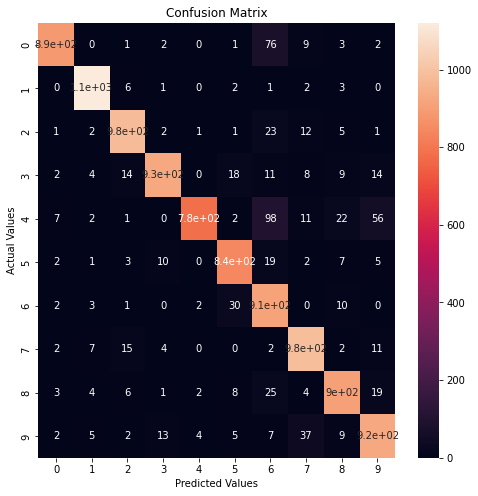

In [260]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
#print(confusion_matrix(y_test, ytest_pred))

# 5 - try differents number of hidden layers, different number of neurons, different number of epoch. Which is best ?

In [68]:
range_epochs = [1,5,10,15,20,25,30]
scores = []
for e in range_epochs:
    fit2 = model.fit(
            train_images,
            to_categorical(train_labels),
            epochs=e,
            batch_size=32,
            )
    scores.append(model.evaluate(test_images,to_categorical(test_labels)))

313/313 [==============================] - 0s 553us/step - loss: 0.8355 - accuracy: 0.9306
Epoch 1/5
1875/1875 [==============================] - 1s 731us/step - loss: 0.1801 - accuracy: 0.9521
Epoch 2/5
1875/1875 [==============================] - 1s 731us/step - loss: 0.1610 - accuracy: 0.9554
Epoch 3/5
1875/1875 [==============================] - 1s 731us/step - loss: 0.1750 - accuracy: 0.9541
Epoch 4/5
1875/1875 [==============================] - 1s 751us/step - loss: 0.1494 - accuracy: 0.9560
Epoch 5/5
313/313 [==============================] - 0s 558us/step - loss: 0.8145 - accuracy: 0.9423
Epoch 1/10
1875/1875 [==============================] - 1s 731us/step - loss: 0.1604 - accuracy: 0.9559
Epoch 2/10
1875/1875 [==============================] - 1s 729us/step - loss: 0.1677 - accuracy: 0.9537
Epoch 3/10
1875/1875 [==============================] - 1s 737us/step - loss: 0.1644 - accuracy: 0.9530
Epoch 4/10
1875/1875 [==============================] - 1s 734us/step - loss: 0.1456

In [80]:
d2 = [item[1] for item in scores]
print(d2)

[0.9305999875068665, 0.942300021648407, 0.9534000158309937, 0.9563000202178955, 0.9496999979019165, 0.9577999711036682, 0.9599000215530396]


Text(0, 0.5, 'Testing Accuracy')

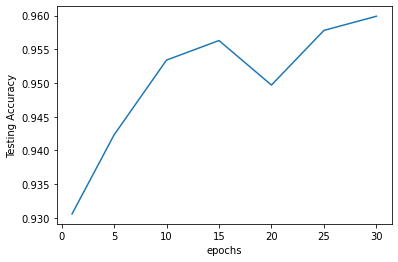

In [77]:
d2 = [item[1] for item in scores]
plt.plot(range_epochs, d2)
plt.xlabel('epochs')
plt.ylabel('Testing Accuracy')

In [87]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels),
)

313/313 [==============================] - 0s 543us/step - loss: 1.3316 - accuracy: 0.9599


[1.3316113948822021, 0.9599000215530396]

In [95]:
range_batch = [32,24,16,8,1]
scores = []
for b in range_batch:
    fit3 = model.fit(
            train_images,
            to_categorical(train_labels),
            epochs=10,
            batch_size=b,
            )
    scores.append(model.evaluate(test_images,to_categorical(test_labels)))

Epoch 1/10
1875/1875 [==============================] - 1s 760us/step - loss: 0.2148 - accuracy: 0.9445
Epoch 2/10
1875/1875 [==============================] - 1s 749us/step - loss: 0.1408 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.1336 - accuracy: 0.9660
Epoch 4/10
1875/1875 [==============================] - 1s 750us/step - loss: 0.1467 - accuracy: 0.9651
Epoch 5/10
1875/1875 [==============================] - 1s 760us/step - loss: 0.1535 - accuracy: 0.9663
Epoch 6/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.1174 - accuracy: 0.9688
Epoch 7/10
1875/1875 [==============================] - 1s 749us/step - loss: 0.1257 - accuracy: 0.9670
Epoch 8/10
1875/1875 [==============================] - 1s 753us/step - loss: 0.1603 - accuracy: 0.9611
Epoch 9/10
1875/1875 [==============================] - 1s 750us/step - loss: 0.1191 - accuracy: 0.9672
Epoch 10/10
313/313 [==============================] - 0s 562us/

Text(0, 0.5, 'Testing Accuracy')

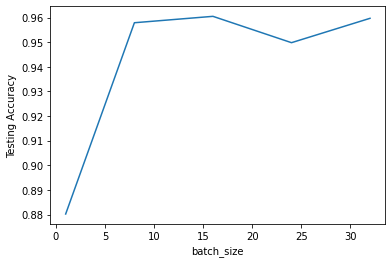

In [98]:
d3 = [item[1] for item in scores]
plt.plot(range_batch, d3)
plt.xlabel('batch_size')
plt.ylabel('Testing Accuracy')

In [157]:
model2 = Sequential([
    Dense(1024, activation='relu', input_shape=(784,)),
    Dense(1024, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax'),
])

# Compile the model.
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels),
)

In [103]:
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=1,
    batch_size=32,
)

469/469 [==============================] - 1s 1ms/step - loss: 0.2024 - accuracy: 0.9391


In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(784,)),
    Dense(32, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [161]:
range_batch = [32,24]
scores = []
for b in range_batch:
    fit3 = model.fit(
            train_images,
            to_categorical(train_labels),
            epochs=10,
            batch_size=b,
            )
    scores.append(model.evaluate(test_images,to_categorical(test_labels)))

Epoch 1/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.1898 - accuracy: 0.9506
Epoch 2/10
1875/1875 [==============================] - 1s 742us/step - loss: 0.1529 - accuracy: 0.9533
Epoch 3/10
1875/1875 [==============================] - 1s 736us/step - loss: 0.1995 - accuracy: 0.9441
Epoch 4/10
1875/1875 [==============================] - 1s 766us/step - loss: 0.1667 - accuracy: 0.9517
Epoch 5/10
1875/1875 [==============================] - 1s 741us/step - loss: 0.1794 - accuracy: 0.9513
Epoch 6/10
1875/1875 [==============================] - 1s 739us/step - loss: 0.1580 - accuracy: 0.9539
Epoch 7/10
1875/1875 [==============================] - 1s 739us/step - loss: 0.1808 - accuracy: 0.9536
Epoch 8/10
1875/1875 [==============================] - 1s 741us/step - loss: 0.1481 - accuracy: 0.9548
Epoch 9/10
1875/1875 [==============================] - 1s 742us/step - loss: 0.2330 - accuracy: 0.9423
Epoch 10/10
313/313 [==============================] - 0s 560us/

Text(0, 0.5, 'Testing Accuracy')

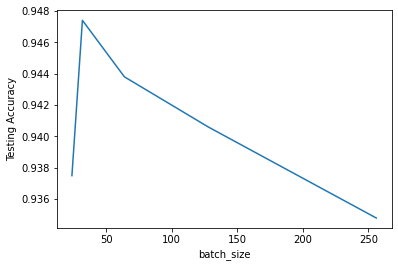

In [160]:
d3 = [item[1] for item in scores]
plt.plot(range_batch, d3)
plt.xlabel('batch_size')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

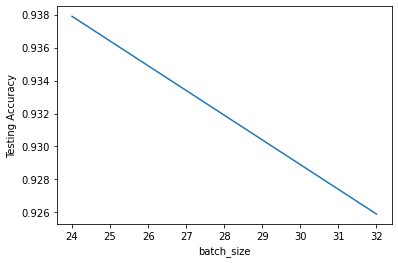

In [162]:
d4 = [item[1] for item in scores]
plt.plot(range_batch, d4)
plt.xlabel('batch_size')
plt.ylabel('Testing Accuracy')

In [167]:
range_epochs = [50,70,90,110]
scores = []
for e in range_epochs:
    fit2 = model.fit(
            train_images,
            to_categorical(train_labels),
            epochs=e,
            batch_size=512,
            )
    scores.append(model.evaluate(test_images,to_categorical(test_labels)))

Epoch 1/50
118/118 [==============================] - 0s 3ms/step - loss: 0.1142 - accuracy: 0.9772
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9776
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9797
Epoch 4/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9806
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9812
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9815
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.9810
Epoch 8/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9815
Epoch 9/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9818
Epoch 10/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9813

118/118 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9829
Epoch 42/90
118/118 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9834
Epoch 43/90
118/118 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9829
Epoch 44/90
118/118 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9818
Epoch 45/90
118/118 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.9772
Epoch 46/90
118/118 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9827
Epoch 47/90
118/118 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9828
Epoch 48/90
118/118 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9819
Epoch 49/90
118/118 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9823
Epoch 50/90
118/118 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9778
Ep

118/118 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9830
Epoch 32/110
118/118 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9824
Epoch 33/110
118/118 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.9808
Epoch 34/110
118/118 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.9810
Epoch 35/110
118/118 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9834
Epoch 36/110
118/118 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9818
Epoch 37/110
118/118 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9834
Epoch 38/110
118/118 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9830
Epoch 39/110
118/118 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9836
Epoch 40/110
118/118 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 

Text(0, 0.5, 'Testing Accuracy')

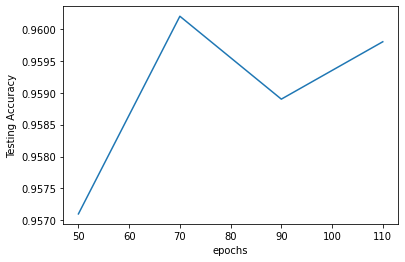

In [168]:
d4 = [item[1] for item in scores]
plt.plot(range_epochs, d4)
plt.xlabel('epochs')
plt.ylabel('Testing Accuracy')

In [169]:
vf = Sequential([
    Dense(1024, activation='relu', input_shape=(784,)),
    Dense(1024, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax'),
])

# Compile the model.
vf.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [170]:
# Train the model.
vf.fit(
train_images,
to_categorical(train_labels),
epochs=70,
batch_size=24,
)

Epoch 1/70
2500/2500 [==============================] - 22s 9ms/step - loss: 0.2646 - accuracy: 0.9172
Epoch 2/70
2500/2500 [==============================] - 21s 9ms/step - loss: 0.1335 - accuracy: 0.9584
Epoch 3/70
2500/2500 [==============================] - 21s 8ms/step - loss: 0.1058 - accuracy: 0.9667
Epoch 4/70
2500/2500 [==============================] - 21s 8ms/step - loss: 0.0877 - accuracy: 0.9726
Epoch 5/70
2500/2500 [==============================] - 21s 9ms/step - loss: 0.0755 - accuracy: 0.9759
Epoch 6/70
2500/2500 [==============================] - 21s 9ms/step - loss: 0.0641 - accuracy: 0.9797
Epoch 7/70
2500/2500 [==============================] - 22s 9ms/step - loss: 0.0599 - accuracy: 0.9806
Epoch 8/70
2500/2500 [==============================] - 21s 8ms/step - loss: 0.0544 - accuracy: 0.9832
Epoch 9/70
2500/2500 [==============================] - 21s 9ms/step - loss: 0.0523 - accuracy: 0.9830
Epoch 10/70
2500/2500 [==============================] - 21s 9ms/step - l

In [171]:
# Evaluate the model.
vf.evaluate(
  test_images,
  to_categorical(test_labels),
)

313/313 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.9778


[0.4640573263168335, 0.9778000116348267]

# Conclusion

- 2 hidden layers,
- 1024 neuros per hidden layer
- 70 epochs
- batch_size=24